# ResNet50 - Analiz

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


[1.135075330734253, 0.5]
Train on 50 samples, validate on 50 samples
Epoch 1/5
50/50 [==============================] - 33s 656ms/step - loss: 0.9540 - acc: 0.5000 - val_loss: 0.8698 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 31s 613ms/step - loss: 0.7539 - acc: 0.4600 - val_loss: 1.2271 - val_acc: 0.5000
Epoch 3/5
50/50 [==============================] - 31s 617ms/step - loss: 0.7780 - acc: 0.5200 - val_loss: 1.0990 - val_acc: 0.5000
Epoch 4/5
50/50 [==============================] - 31s 612ms/step - loss: 0.6603 - acc: 0.5200 - val_loss: 0.8357 - val_acc: 0.5000
Epoch 5/5
50/50 [==============================] - 31s 618ms/step - loss: 0.5437 - acc: 0.8200 - val_loss: 0.7063 - val_acc: 0.4200
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


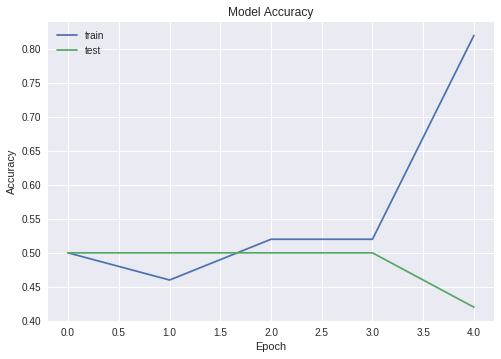

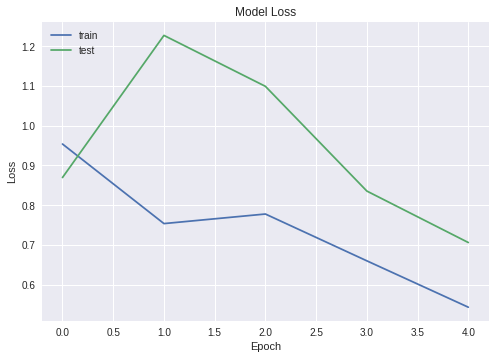

In [0]:
from keras.preprocessing import image
from keras.applications import resnet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

batch_size = 50
num_classes = 2

base_model = resnet50.ResNet50

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])

x_train = np.random.normal(loc=127, scale=127, size=(50, 224,224,3))
y_train = np.array([0,1]*25)
x_train = resnet50.preprocess_input(x_train)


print(model.evaluate(x_train, y_train, batch_size=batch_size, verbose=0))


history = model.fit(x_train, y_train,
          epochs=5,
          batch_size=batch_size,
          shuffle=False,
          validation_data=(x_train, y_train))

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## ResNet50 - NESNE TANIMA

**Gerekli paketler yükleniyor**

In [0]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

Using TensorFlow backend.


**ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor**

In [0]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 2s 0us/step


**Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor**

In [0]:
def prepare_image(image, target):
	# resize the input image and preprocess it
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# return the processed image
	return image

**Sınıflandırma istediğiniz resmin web adresini aşağıdaki giriş alanına giriniz.**

In [0]:
ImageURL = "https://www.mailce.com/wp-content/uploads/2012/12/atlar-2.jpg" #@param {type:"string"}


**Girilen web adresinden resim indiriliyor**

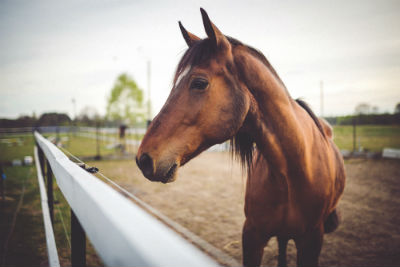

In [0]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**Eğitilmiş model ile sınıflandırma yapılıyor.**

In [0]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224))

preds = model.predict(pre_image)

results = imagenet_utils.decode_predictions(preds)
data["predictions"] = []


for (imagenetID, label, prob) in results[0]:
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'sorrel', 'probability': 0.9652838110923767}, {'label': 'worm_fence', 'probability': 0.017581932246685028}, {'label': 'hartebeest', 'probability': 0.009528221562504768}, {'label': 'Doberman', 'probability': 0.002217015018686652}, {'label': 'horse_cart', 'probability': 0.0013239295221865177}]}


**Sınıflandırma sonuçları.**

In [0]:
 print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))


Sınıflandırma tahmini en yüksek olan 0.9652838110923767 oranıyla sorrel'dır.
